In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('dataset/Iris.csv')
# Display the first few rows of the dataset
print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [4]:
# Drop the 'Id' column and set features for clustering
X = data.drop(columns=['Id', 'Species'])

In [5]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Determine the optimal number of clusters using the elbow method
inertia = []
k_range = range(1, 11)  # Testing cluster sizes from 1 to 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

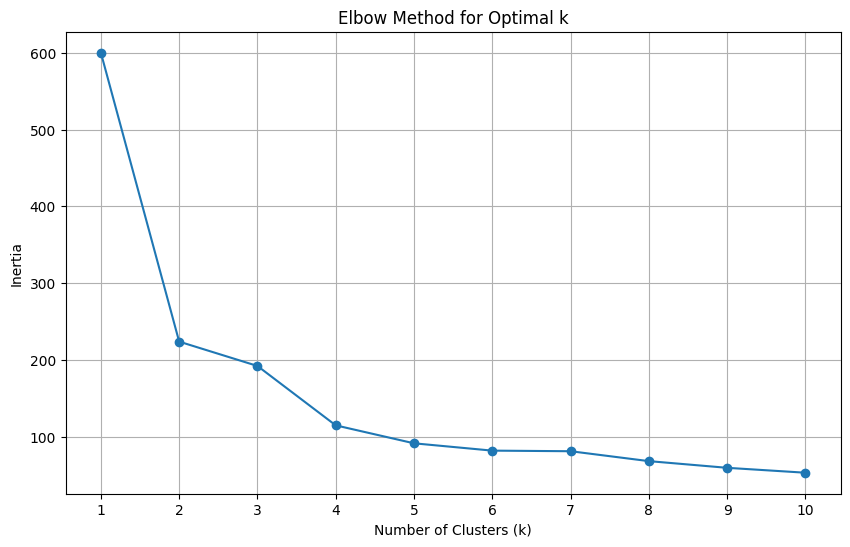

In [9]:
# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid()
plt.show()

In [10]:
# Based on the elbow plot, choose an appropriate number of clusters (e.g., 3)
optimal_k = 3  # Adjust this based on your elbow plot observation


In [11]:
# Fit K-Means with the optimal number of clusters
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans_final.fit_predict(X_scaled)

# Display the resulting clusters
print(data[['Species', 'Cluster']].head(10))



       Species  Cluster
0  Iris-setosa        1
1  Iris-setosa        2
2  Iris-setosa        2
3  Iris-setosa        2
4  Iris-setosa        1
5  Iris-setosa        1
6  Iris-setosa        1
7  Iris-setosa        1
8  Iris-setosa        2
9  Iris-setosa        2
